<a href="https://colab.research.google.com/github/leekahhow/DataScience/blob/master/PSI_Prediction(Clean).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the relevant packages
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# mount drive so datasets can be accessed from drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#read csv from google drive after copying/pasting file path
#these are just readings of pm2.5 based on what was extracted previously from data.gov
psi_df_2016=pd.read_csv('/content/drive/My Drive/Uplevel PSI Prediction/psi_df_2016.csv')
psi_df_2017=pd.read_csv('/content/drive/My Drive/Uplevel PSI Prediction/psi_df_2
017.csv')
psi_df_2018=pd.read_csv('/content/drive/My Drive/Uplevel PSI Prediction/psi_df_2018.csv')
psi_df_2019=pd.read_csv('/content/drive/My Drive/Uplevel PSI Prediction/psi_df_2019.csv')

In [0]:
#psi_df_2016['year'] = pd.DatetimeIndex(psi_df_2016['timestamp']).year
#psi_df_2016['month'] = pd.DatetimeIndex(psi_df_2016['timestamp']).month

#psi_df_2017['year'] = pd.DatetimeIndex(psi_df_2017['timestamp']).year
#psi_df_2017['month'] = pd.DatetimeIndex(psi_df_2017['timestamp']).month

#psi_df_2018['year'] = pd.DatetimeIndex(psi_df_2018['timestamp']).year
#psi_df_2018['month'] = pd.DatetimeIndex(psi_df_2018['timestamp']).month

#psi_df_2019['year'] = pd.DatetimeIndex(psi_df_2019['timestamp']).year
#psi_df_2019['month'] = pd.DatetimeIndex(psi_df_2019['timestamp']).month

#psi_df_2019

list_of_df = [psi_df_2016,psi_df_2017,psi_df_2018,psi_df_2019]
for year_df in list_of_df:
  year_df['year']= pd.DatetimeIndex(year_df['timestamp']).year
  year_df['month']= pd.DatetimeIndex(year_df['timestamp']).month

In [5]:
frames = [psi_df_2016, psi_df_2017, psi_df_2018, psi_df_2019]

psi_df_all = pd.concat(frames, ignore_index= True)
psi_df_all

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,central,east,month,national,north,south,timestamp,west,year
0,47,47,2,47,37,44,2016-02-07T18:00:00+08:00,34,2016
1,57,59,2,59,54,57,2016-02-08T23:00:00+08:00,56,2016
2,57,59,2,59,55,57,2016-02-09T01:00:00+08:00,56,2016
3,56,59,2,59,55,57,2016-02-09T02:00:00+08:00,56,2016
4,56,59,2,59,55,58,2016-02-09T03:00:00+08:00,56,2016
...,...,...,...,...,...,...,...,...,...
30017,74,72,11,78,71,78,2019-11-06T10:00:00+08:00,76,2019
30018,73,71,11,77,71,77,2019-11-06T11:00:00+08:00,75,2019
30019,73,71,11,77,71,77,2019-11-06T12:00:00+08:00,74,2019
30020,73,72,11,78,71,78,2019-11-06T13:00:00+08:00,74,2019


In [6]:
median_month_all = psi_df_all.groupby(['month']).median()
median_monthyear_all = psi_df_all.groupby(['year','month']).median()
median_monthyear_all

central  east  national  north  south  west
year month                                             
2016 2           51    53        53     46     51    47
     3           57    56        59     55     58    56
     4           59    56        64     61     58    61
     5           54    52        57     56     53    52
     6           52    52        58     58     54    52
     7           51    47        57     56     52    52
     8           54    52        58     58     54    54
     9           54    53        59     58     55    53
     10          54    52        58     58     55    52
     11          52    51        54     53     52    41
     12          38    48        52     46     42    42
2017 1           42    49        51     49     45    39
     2           47    47        53     52     52    42
     3           55    55        59     56     59    53
     4           54    55        60     56     59    54
     5           45    47        55     53     54    44
     6           43    46        55     53     52    48
     7           43    48        53     53     49    50
     8           44    48        53     53     49    45
     9           52    54        58     56     52    54
     10          56    58        61     58     57    54
     11          49    54        55     53     52    41
     12          52    53        55     52     51    44
2018 1           43    47        51     46     38    36
     2           57    54        58     54     57    53
     3           51    51        55     53     54    51
     4           54    53        58     55     56    52
     5           54    51        57     55     55    47
     6           54    46        55     53     53    47
     7           57    58        62     57     62    55
     8           57    58        60     57     60    55
     9           59    57        61     59     58    59
     10          57    57        59     56     59    52
     11          52    53        54     50     52    40
     12          48    50        52     44     51    32
2019 1           46    51        52     42     52    36
     2           48    49        54     43     53    36
     3           57    56        58     53     57    53
     4           55    54        57     52     56    52
     5           52    52        54     53     51    46
     6           43    36        48     45     41    39
     7           52    53        54     52     52    53
     8           58    59        60     57     60    58
     9           73    73        76     71     75    74
     10          57    56        59     57     56    57
     11          68    69        72     70     70    63

In [0]:
median_monthyear_all= pd.DataFrame(median_monthyear_all)
median_month_all=pd.DataFrame(median_month_all)

In [8]:
# subsets of yearly median
median_monthyear_all = median_monthyear_all.reset_index()
median_month_all=median_month_all.reset_index()

median_month2019_all= median_monthyear_all[median_monthyear_all['year'] == 2019]
median_month2018_all= median_monthyear_all[median_monthyear_all['year'] == 2018]
median_month2017_all= median_monthyear_all[median_monthyear_all['year'] == 2017]
median_month2016_all= median_monthyear_all[median_monthyear_all['year'] == 2016]

median_month2016_all


,year,month,central,east,national,north,south,west
0,2016,2,51,53,53,46,51,47
1,2016,3,57,56,59,55,58,56
2,2016,4,59,56,64,61,58,61
3,2016,5,54,52,57,56,53,52
4,2016,6,52,52,58,58,54,52
5,2016,7,51,47,57,56,52,52
6,2016,8,54,52,58,58,54,54
7,2016,9,54,53,59,58,55,53
8,2016,10,54,52,58,58,55,52
9,2016,11,52,51,54,53,52,41


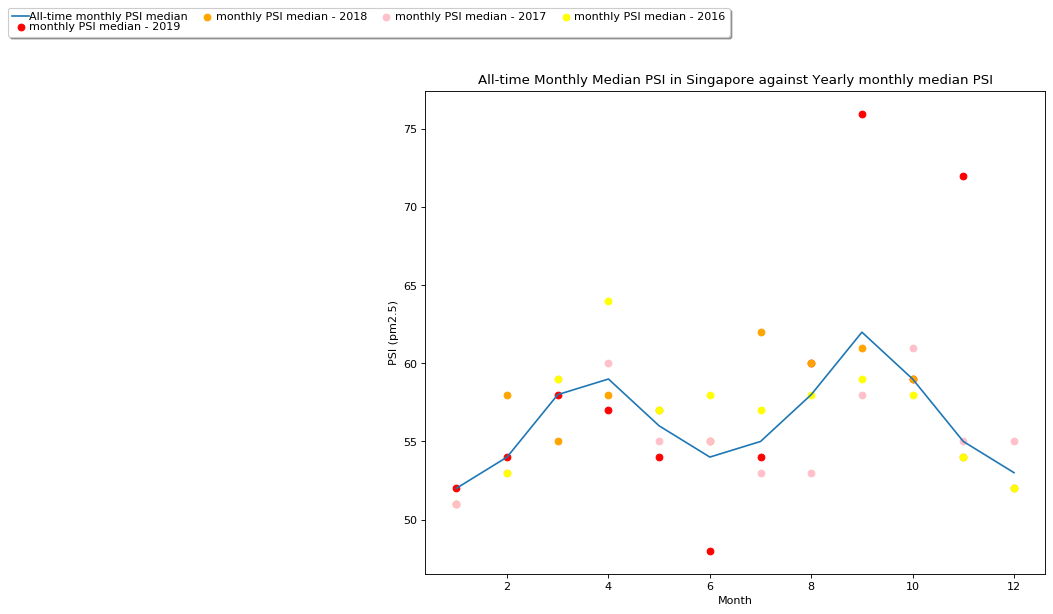

In [9]:
#visualization of monthly PSI for each year (scatter), and all-time median PSI by month (line) 
#will have to fix x-axis labels first before visualizing subplots
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')


plt.plot(median_month_all['month'],median_month_all['national'], label='All-time monthly PSI median')
median_2019= plt.scatter(median_month2019_all['month'],median_month2019_all['national'], c='red',label='monthly PSI median - 2019')
median_2018= plt.scatter(median_month2018_all['month'],median_month2018_all['national'], c='orange',label='monthly PSI median - 2018')
median_2017= plt.scatter(median_month2017_all['month'],median_month2017_all['national'], c='pink',label='monthly PSI median - 2017')
median_2016= plt.scatter(median_month2016_all['month'],median_month2016_all['national'], c='yellow',label='monthly PSI median - 2016')

#plt.gcf().autofmt_xdate()
plt.legend(ncol=4, loc='lower right', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
# A hacky way to do it but basically (0 start, 9000 is the number of entries, and 672 is the skips)
#plt.xticks(np.arange(0, 9000, 672)) 
# Add title and axis names
plt.title('All-time Monthly Median PSI in Singapore against Yearly monthly median PSI')
plt.xlabel('Month')
plt.ylabel('PSI (pm2.5)')
plt.show()

In [10]:
#check dataset
psi_df_2016.head()

,national,south,north,east,central,west,timestamp,year,month
0,47,44,37,47,47,34,2016-02-07T18:00:00+08:00,2016,2
1,59,57,54,59,57,56,2016-02-08T23:00:00+08:00,2016,2
2,59,57,55,59,57,56,2016-02-09T01:00:00+08:00,2016,2
3,59,57,55,59,56,56,2016-02-09T02:00:00+08:00,2016,2
4,59,58,55,59,56,56,2016-02-09T03:00:00+08:00,2016,2


In [26]:
# select relevant columns for median and mean calculation
x = ['national', 'south', 'north', 'east', 'central'] 


list_of_df = [psi_df_2016,psi_df_2017,psi_df_2018,psi_df_2019]
for year_df in list_of_df:
  year_df['mean']=year_df[x].mean(axis=1, skipna=True)
  year_df['median']=year_df[x].median(axis=1, skipna=True)
psi_df_2016.head(100)

#psi_df_all

,national,south,north,east,central,west,timestamp,year,month,mean,median,day
0,47,44,37,47,47,34,2016-02-07T18:00:00+08:00,2016,2,44.4,47.0,Sunday
1,59,57,54,59,57,56,2016-02-08T23:00:00+08:00,2016,2,57.2,57.0,Monday
2,59,57,55,59,57,56,2016-02-09T01:00:00+08:00,2016,2,57.4,57.0,Tuesday
3,59,57,55,59,56,56,2016-02-09T02:00:00+08:00,2016,2,57.2,57.0,Tuesday
4,59,58,55,59,56,56,2016-02-09T03:00:00+08:00,2016,2,57.4,58.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
95,51,49,37,39,51,39,2016-02-13T06:00:00+08:00,2016,2,45.4,49.0,Saturday
96,51,49,37,39,51,38,2016-02-13T07:00:00+08:00,2016,2,45.4,49.0,Saturday
97,51,48,36,43,51,38,2016-02-13T08:00:00+08:00,2016,2,45.8,48.0,Saturday
98,51,48,36,39,51,37,2016-02-13T09:00:00+08:00,2016,2,45.0,48.0,Saturday


In [30]:
x = ['national', 'south', 'north', 'east', 'central'] 
psi_df_all['mean']=psi_df_all[x].mean(axis=1, skipna=True)
psi_df_all['median']=psi_df_all[x].median(axis=1, skipna=True)
psi_df_all

,central,east,month,national,north,south,timestamp,west,year,mean,median
0,47,47,2,47,37,44,2016-02-07T18:00:00+08:00,34,2016,44.4,47.0
1,57,59,2,59,54,57,2016-02-08T23:00:00+08:00,56,2016,57.2,57.0
2,57,59,2,59,55,57,2016-02-09T01:00:00+08:00,56,2016,57.4,57.0
3,56,59,2,59,55,57,2016-02-09T02:00:00+08:00,56,2016,57.2,57.0
4,56,59,2,59,55,58,2016-02-09T03:00:00+08:00,56,2016,57.4,58.0
...,...,...,...,...,...,...,...,...,...,...,...
30017,74,72,11,78,71,78,2019-11-06T10:00:00+08:00,76,2019,74.6,74.0
30018,73,71,11,77,71,77,2019-11-06T11:00:00+08:00,75,2019,73.8,73.0
30019,73,71,11,77,71,77,2019-11-06T12:00:00+08:00,74,2019,73.8,73.0
30020,73,72,11,78,71,78,2019-11-06T13:00:00+08:00,74,2019,74.4,73.0


In [31]:
import datetime
psi_df_2016['day']=psi_df_2016['timestamp']
psi_df_all['day']=psi_df_all['timestamp']
#the following is just an attempt to do it for a single row which helps to structure thoughts about doing it for all the rows
#example=psi_df_2016['day'][1]
#example2=psi_df_2016['day'][2]
#print(example)
#datetime_example = datetime.datetime.strptime(example, "%Y-%m-%dT%H:%M:%W+08:00")
#datetime_example2 = datetime.datetime.strptime(example2, "%Y-%m-%dT%H:%M:%W+08:00")
#print(datetime_example)
#print(datetime_example2)
#print(type(datetime_example))
#print(datetime_example.weekday())
#print(datetime_example2.weekday())
#print(datetime_example2.hour())
#psi_df_2016.head(100)
psi_df_all

,central,east,month,national,north,south,timestamp,west,year,mean,median,day
0,47,47,2,47,37,44,2016-02-07T18:00:00+08:00,34,2016,44.4,47.0,2016-02-07T18:00:00+08:00
1,57,59,2,59,54,57,2016-02-08T23:00:00+08:00,56,2016,57.2,57.0,2016-02-08T23:00:00+08:00
2,57,59,2,59,55,57,2016-02-09T01:00:00+08:00,56,2016,57.4,57.0,2016-02-09T01:00:00+08:00
3,56,59,2,59,55,57,2016-02-09T02:00:00+08:00,56,2016,57.2,57.0,2016-02-09T02:00:00+08:00
4,56,59,2,59,55,58,2016-02-09T03:00:00+08:00,56,2016,57.4,58.0,2016-02-09T03:00:00+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...
30017,74,72,11,78,71,78,2019-11-06T10:00:00+08:00,76,2019,74.6,74.0,2019-11-06T10:00:00+08:00
30018,73,71,11,77,71,77,2019-11-06T11:00:00+08:00,75,2019,73.8,73.0,2019-11-06T11:00:00+08:00
30019,73,71,11,77,71,77,2019-11-06T12:00:00+08:00,74,2019,73.8,73.0,2019-11-06T12:00:00+08:00
30020,73,72,11,78,71,78,2019-11-06T13:00:00+08:00,74,2019,74.4,73.0,2019-11-06T13:00:00+08:00


In [36]:
def convert_to_string(x):
  x=datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%W+08:00")
  return x
psi_df_2016['day']=psi_df_2016['day'].apply(convert_to_string)
psi_df_all['day']=psi_df_all['day'].apply(convert_to_string)
print(psi_df_2016['day'])
print(psi_df_all['day'])

0       2016-02-07 18:00:00
1       2016-02-08 23:00:00
2       2016-02-09 01:00:00
3       2016-02-09 02:00:00
4       2016-02-09 03:00:00
                ...        
30017   2019-11-06 10:00:00
30018   2019-11-06 11:00:00
30019   2019-11-06 12:00:00
30020   2019-11-06 13:00:00
30021   2019-11-06 14:00:00
Name: day, Length: 30022, dtype: datetime64[ns]


In [0]:
import calendar
def convert_to_day(x):
  x=calendar.day_name[x.weekday()]
  return x
psi_df_2016['day']=psi_df_2016['day'].apply(convert_to_day)
psi_df_all['day']=psi_df_all['day'].apply(convert_to_day)

In [39]:
#confirm that the output is right
print(psi_df_2016['day'])
print(psi_df_all['day'])

0         Sunday
1         Monday
2        Tuesday
3        Tuesday
4        Tuesday
          ...   
6836    Saturday
6837    Saturday
6838    Saturday
6839    Saturday
6840    Saturday
Name: day, Length: 6841, dtype: object


In [41]:
#create one-hot encoding 
pd.get_dummies(psi_df_2016['day'], drop_first=True)
psi_df_2016_2 = pd.concat([psi_df_2016, pd.get_dummies(psi_df_2016['day'])], axis=1); psi_df_2016
psi_df_2016_2
#should drop one column to reduce collinearity
pd.get_dummies(psi_df_all['day'], drop_first=True)
psi_df_all_2 = pd.concat([psi_df_all, pd.get_dummies(psi_df_all['day'])], axis=1); psi_df_all
psi_df_all_2

,central,east,month,national,north,south,timestamp,west,year,mean,median,day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,47,47,2,47,37,44,2016-02-07T18:00:00+08:00,34,2016,44.4,47.0,Sunday,0,0,0,1,0,0,0
1,57,59,2,59,54,57,2016-02-08T23:00:00+08:00,56,2016,57.2,57.0,Monday,0,1,0,0,0,0,0
2,57,59,2,59,55,57,2016-02-09T01:00:00+08:00,56,2016,57.4,57.0,Tuesday,0,0,0,0,0,1,0
3,56,59,2,59,55,57,2016-02-09T02:00:00+08:00,56,2016,57.2,57.0,Tuesday,0,0,0,0,0,1,0
4,56,59,2,59,55,58,2016-02-09T03:00:00+08:00,56,2016,57.4,58.0,Tuesday,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30017,74,72,11,78,71,78,2019-11-06T10:00:00+08:00,76,2019,74.6,74.0,Wednesday,0,0,0,0,0,0,1
30018,73,71,11,77,71,77,2019-11-06T11:00:00+08:00,75,2019,73.8,73.0,Wednesday,0,0,0,0,0,0,1
30019,73,71,11,77,71,77,2019-11-06T12:00:00+08:00,74,2019,73.8,73.0,Wednesday,0,0,0,0,0,0,1
30020,73,72,11,78,71,78,2019-11-06T13:00:00+08:00,74,2019,74.4,73.0,Wednesday,0,0,0,0,0,0,1


In [42]:
#added column with hours
import datetime
psi_df_2016_2['hour'] = psi_df_2016['timestamp'].apply(convert_to_string)
psi_df_2016_2['hour'] = psi_df_2016_2['hour'].dt.hour
#psi_df_2016_2.head()
psi_df_all_2['hour'] = psi_df_all['timestamp'].apply(convert_to_string)
psi_df_all_2['hour'] = psi_df_all_2['hour'].dt.hour
psi_df_all_2.head()

,central,east,month,national,north,south,timestamp,west,year,mean,median,day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,hour
0,47,47,2,47,37,44,2016-02-07T18:00:00+08:00,34,2016,44.4,47.0,Sunday,0,0,0,1,0,0,0,18
1,57,59,2,59,54,57,2016-02-08T23:00:00+08:00,56,2016,57.2,57.0,Monday,0,1,0,0,0,0,0,23
2,57,59,2,59,55,57,2016-02-09T01:00:00+08:00,56,2016,57.4,57.0,Tuesday,0,0,0,0,0,1,0,1
3,56,59,2,59,55,57,2016-02-09T02:00:00+08:00,56,2016,57.2,57.0,Tuesday,0,0,0,0,0,1,0,2
4,56,59,2,59,55,58,2016-02-09T03:00:00+08:00,56,2016,57.4,58.0,Tuesday,0,0,0,0,0,1,0,3


In [0]:
#one-hot encoding for hours
pd.get_dummies(psi_df_2016_2['hour'], drop_first=True)
psi_df_2016_3 = pd.concat([psi_df_2016_2, pd.get_dummies(psi_df_2016_2['hour'])], axis=1); psi_df_2016_2
psi_df_2016_3.head()
#drop one column to reduce collinearity
psi_df_2016_3=psi_df_2016_3.drop(['day','Monday','hour'],axis=1)

In [0]:
#one-hot encoding for hours
pd.get_dummies(psi_df_all_2['hour'], drop_first=True)
psi_df_all_3 = pd.concat([psi_df_all_2, pd.get_dummies(psi_df_all_2['hour'])], axis=1); psi_df_2016_2
psi_df_all_3.head()
#drop one column to reduce collinearity
psi_df_all_3=psi_df_all_3.drop(['day','Monday','hour'],axis=1)

In [50]:
psi_df_2016_3.head()

,national,south,north,east,central,west,timestamp,year,month,mean,median,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,47,44,37,47,47,34,2016-02-07T18:00:00+08:00,2016,2,44.4,47.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,59,57,54,59,57,56,2016-02-08T23:00:00+08:00,2016,2,57.2,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,59,57,55,59,57,56,2016-02-09T01:00:00+08:00,2016,2,57.4,57.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,59,57,55,59,56,56,2016-02-09T02:00:00+08:00,2016,2,57.2,57.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,59,58,55,59,56,56,2016-02-09T03:00:00+08:00,2016,2,57.4,58.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
psi_df_all_3

,central,east,month,national,north,south,timestamp,west,year,mean,median,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,47,47,2,47,37,44,2016-02-07T18:00:00+08:00,34,2016,44.4,47.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,57,59,2,59,54,57,2016-02-08T23:00:00+08:00,56,2016,57.2,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,57,59,2,59,55,57,2016-02-09T01:00:00+08:00,56,2016,57.4,57.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,56,59,2,59,55,57,2016-02-09T02:00:00+08:00,56,2016,57.2,57.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,56,59,2,59,55,58,2016-02-09T03:00:00+08:00,56,2016,57.4,58.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30017,74,72,11,78,71,78,2019-11-06T10:00:00+08:00,76,2019,74.6,74.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
30018,73,71,11,77,71,77,2019-11-06T11:00:00+08:00,75,2019,73.8,73.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
30019,73,71,11,77,71,77,2019-11-06T12:00:00+08:00,74,2019,73.8,73.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
30020,73,72,11,78,71,78,2019-11-06T13:00:00+08:00,74,2019,74.4,73.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
X = psi_df_2016_3.iloc[:, 11:40].values
y = psi_df_2016_3.iloc[:, 10].values
#print(psi_df_2016_3.head())
print (y)

In [52]:
# try selecting a different set of variables to fit model 
#create one-hot encoding 
pd.get_dummies(psi_df_2016_3['month'],prefix ='month', drop_first=True)
psi_df_2016_4 = pd.concat([psi_df_2016_3, pd.get_dummies(psi_df_2016_3['month'],prefix ='month')], axis=1); psi_df_2016


psi_df_2016_4['day_of_month']= psi_df_2016_4['timestamp'].apply(convert_to_string).dt.day
pd.get_dummies(psi_df_2016_4['day_of_month'],prefix ='day_of_month', drop_first=True)
psi_df_2016_4 = pd.concat([psi_df_2016_4, pd.get_dummies(psi_df_2016_4['day_of_month'],prefix ='day_of_month')], axis=1); 
psi_df_2016_4.head(100)

psi_df_2016_4=psi_df_2016_4.drop(['mean_2','day_of_month'],axis=1)

#should drop one column to reduce collinearity

X = psi_df_2016_4.iloc[:, [7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
                           ,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,67,68,69,70,71,72,73,74,75,76,77,78,79,80]].values
y = psi_df_2016_4.iloc[:, 0].values
#print(psi_df_2016_3.head())
print (X)

#(with months, with months + day of month)

# MLR Train score:
#0.17984928533070277,0.23297282817019105
#MLR Test score:
#0.17245401806561933,0.22436492411781905

#KNR training set score: 0.012816575012583598, 0.23588655792132784
#KNR test set score: -0.04336096197834571, 0.22436492411781905

# xgb RMSE: 21.753028, RMSE: 21.595246

# Random Forest Regressor
#Mean Absolute Error: 7.729186684470468, 2.133148283418554
#Mean Squared Error: 114.98837730325221, 16.158551935719505
#Root Mean Squared Error: 10.723263370040494, 4.0197701346867465

KeyError: ignored

In [54]:
#PSI_DF_ALL
# try selecting a different set of variables to fit model 
#create one-hot encoding 
pd.get_dummies(psi_df_all_3['month'],prefix ='month', drop_first=True)
psi_df_all_4 = pd.concat([psi_df_all_3, pd.get_dummies(psi_df_all_3['month'],prefix ='month')], axis=1); psi_df_all


psi_df_all_4['day_of_month']= psi_df_all_4['timestamp'].apply(convert_to_string).dt.day
pd.get_dummies(psi_df_all_4['day_of_month'],prefix ='day_of_month', drop_first=True)
psi_df_all_4 = pd.concat([psi_df_all_4, pd.get_dummies(psi_df_all_4['day_of_month'],prefix ='day_of_month')], axis=1); 
psi_df_all_4.head(100)

psi_df_all_4=psi_df_all_4.drop(['day_of_month'],axis=1)

#should drop one column to reduce collinearity

X = psi_df_all_4.iloc[:, [7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
                           ,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,67,68,69,70,71,72,73,74,75,76,77,78,79,80]].values
y = psi_df_all_4.iloc[:, 0].values
#print(psi_df_2016_3.head())
print (X)

#(with months, with months + day of month)

# MLR Train score:
#0.17984928533070277,0.23297282817019105
#MLR Test score:
#0.17245401806561933,0.22436492411781905

#KNR training set score: 0.012816575012583598, 0.23588655792132784
#KNR test set score: -0.04336096197834571, 0.22436492411781905

# xgb RMSE: 21.753028, RMSE: 21.595246

# Random Forest Regressor
#Mean Absolute Error: 7.729186684470468, 2.133148283418554
#Mean Squared Error: 114.98837730325221, 16.158551935719505
#Root Mean Squared Error: 10.723263370040494, 4.0197701346867465

[[  34 2016    0 ...    0    0    0]
 [  56 2016    0 ...    0    0    0]
 [  56 2016    0 ...    0    0    0]
 ...
 [  74 2019    0 ...    0    0    0]
 [  74 2019    0 ...    0    0    0]
 [  74 2019    0 ...    0    0    0]]


In [62]:

psi_df_2016_4['day_of_month']= psi_df_2016_4['timestamp'].apply(convert_to_string).dt.day
pd.get_dummies(psi_df_2016_4['day_of_month'],prefix ='day_of_month', drop_first=True)
psi_df_2016_4 = pd.concat([psi_df_2016_4, pd.get_dummies(psi_df_2016_4['day_of_month'],prefix ='day_of_month')], axis=1); 
psi_df_2016_4.head(100)


,national,south,north,east,central,west,timestamp,year,month,mean,median,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,...,day_of_month_23,day_of_month_24,day_of_month_25,day_of_month_26,day_of_month_27,day_of_month_28,day_of_month_29,day_of_month_30,day_of_month_31,day_of_month_1,day_of_month_2,day_of_month_3,day_of_month_4,day_of_month_5,day_of_month_6,day_of_month_7,day_of_month_8,day_of_month_9,day_of_month_10,day_of_month_11,day_of_month_12,day_of_month_13,day_of_month_14,day_of_month_15,day_of_month_16,day_of_month_17,day_of_month_18,day_of_month_19,day_of_month_20,day_of_month_21,day_of_month_22,day_of_month_23,day_of_month_24,day_of_month_25,day_of_month_26,day_of_month_27,day_of_month_28,day_of_month_29,day_of_month_30,day_of_month_31
0,47,44,37,47,47,34,2016-02-07T18:00:00+08:00,2016,2,44.4,47.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,59,57,54,59,57,56,2016-02-08T23:00:00+08:00,2016,2,57.2,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,59,57,55,59,57,56,2016-02-09T01:00:00+08:00,2016,2,57.4,57.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,59,57,55,59,56,56,2016-02-09T02:00:00+08:00,2016,2,57.2,57.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,59,58,55,59,56,56,2016-02-09T03:00:00+08:00,2016,2,57.4,58.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,51,49,37,39,51,39,2016-02-13T06:00:00+08:00,2016,2,45.4,49.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96,51,49,37,39,51,38,2016-02-13T07:00:00+08:00,2016,2,45.4,49.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,51,48,36,43,51,38,2016-02-13T08:00:00+08:00,2016,2,45.8,48.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98,51,48,36,39,51,37,2016-02-13T09:00:00+08:00,2016,2,45.0,48.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
psi_df_all_4['day_of_month']= psi_df_all_4['timestamp'].apply(convert_to_string).dt.day
pd.get_dummies(psi_df_all_4['day_of_month'],prefix ='day_of_month', drop_first=True)
psi_df_all_4 = pd.concat([psi_df_all_4, pd.get_dummies(psi_df_all_4['day_of_month'],prefix ='day_of_month')], axis=1); 
psi_df_all_4.head(100)

TypeError: ignored

In [78]:
#resample daily for all df
daily_psi_df_all = psi_df_all_4
daily_psi_df_all["timestamp"] = pd.to_datetime(daily_psi_df_all["timestamp"])
type(daily_psi_df_all.timestamp[0])
daily_psi_df_all.set_index("timestamp")
daily_psi_df_all = daily_psi_df_all.resample('D', on='timestamp').median()
daily_psi_df_all

,central,east,month,national,north,south,west,year,mean,median,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,month_1,...,day_of_month_23,day_of_month_24,day_of_month_25,day_of_month_26,day_of_month_27,day_of_month_28,day_of_month_29,day_of_month_30,day_of_month_31,day_of_month_1,day_of_month_2,day_of_month_3,day_of_month_4,day_of_month_5,day_of_month_6,day_of_month_7,day_of_month_8,day_of_month_9,day_of_month_10,day_of_month_11,day_of_month_12,day_of_month_13,day_of_month_14,day_of_month_15,day_of_month_16,day_of_month_17,day_of_month_18,day_of_month_19,day_of_month_20,day_of_month_21,day_of_month_22,day_of_month_23,day_of_month_24,day_of_month_25,day_of_month_26,day_of_month_27,day_of_month_28,day_of_month_29,day_of_month_30,day_of_month_31
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-07 00:00:00+08:00,47.0,47.0,2.0,47.0,37.0,44.0,34.0,2016.0,44.4,47.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-08 00:00:00+08:00,57.0,59.0,2.0,59.0,54.0,57.0,56.0,2016.0,57.2,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-09 00:00:00+08:00,58.0,62.0,2.0,62.0,58.0,58.0,58.0,2016.0,59.6,58.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-10 00:00:00+08:00,55.0,59.0,2.0,59.0,53.0,54.0,54.0,2016.0,56.0,55.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-11 00:00:00+08:00,31.0,37.0,2.0,37.0,32.0,36.0,32.0,2016.0,34.6,36.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-02 00:00:00+08:00,68.0,68.0,11.0,72.0,68.0,72.0,66.0,2019.0,69.8,69.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-11-03 00:00:00+08:00,61.0,59.0,11.0,62.0,62.0,61.0,60.0,2019.0,61.0,61.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-11-04 00:00:00+08:00,65.0,68.0,11.0,70.0,70.0,67.0,57.0,2019.0,68.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [79]:
daily_psi_df_all.columns

Index([        'central',            'east',           'month',
              'national',           'north',           'south',
                  'west',            'year',            'mean',
                'median',
       ...
       'day_of_month_22', 'day_of_month_23', 'day_of_month_24',
       'day_of_month_25', 'day_of_month_26', 'day_of_month_27',
       'day_of_month_28', 'day_of_month_29', 'day_of_month_30',
       'day_of_month_31'],
      dtype='object', length=145)

In [80]:
X = psi_df_all_4.iloc[:, [7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
                           ,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,67,68,69,70,71,72,73,74,75,76,77,78,79,80]].values
y = psi_df_all_4.iloc[:, 0].values
#print(psi_df_2016_3.head())

IndexError: ignored

In [0]:
daily_psi_df_all.to_csv('daily_psi_df_all.csv')
from google.colab import files
files.download('daily_psi_df_all.csv')


In [84]:
psi_df_all_indo=pd.read_csv('/content/drive/My Drive/Uplevel PSI Prediction/daily_psi_df_all_indo.csv')
psi_df_all_indo.head()

,timestamp,central,east,month,national,north,south,west,year,mean,median,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,...,day_of_month_24.1,day_of_month_25.1,day_of_month_26.1,day_of_month_27.1,day_of_month_28.1,day_of_month_29.1,day_of_month_30.1,day_of_month_31.1,day_of_month_1.2,day_of_month_2.2,day_of_month_3.2,day_of_month_4.2,day_of_month_5.2,day_of_month_6.2,day_of_month_7.2,day_of_month_8.2,day_of_month_9.2,day_of_month_10.2,day_of_month_11.2,day_of_month_12.2,day_of_month_13.2,day_of_month_14.2,day_of_month_15.2,day_of_month_16.2,day_of_month_17.2,day_of_month_18.2,day_of_month_19.2,day_of_month_20.2,day_of_month_21.2,day_of_month_22.2,day_of_month_23.2,day_of_month_24.2,day_of_month_25.2,day_of_month_26.2,day_of_month_27.2,day_of_month_28.2,day_of_month_29.2,day_of_month_30.2,day_of_month_31.2,indo
0,2016-02-07 00:00:00+08:00,47.0,47.0,2.0,47.0,37.0,44.0,34.0,2016.0,44.4,47.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2016-02-08 00:00:00+08:00,57.0,59.0,2.0,59.0,54.0,57.0,56.0,2016.0,57.2,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2016-02-09 00:00:00+08:00,58.0,62.0,2.0,62.0,58.0,58.0,58.0,2016.0,59.6,58.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2016-02-10 00:00:00+08:00,55.0,59.0,2.0,59.0,53.0,54.0,54.0,2016.0,56.0,55.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,2016-02-11 00:00:00+08:00,31.0,37.0,2.0,37.0,32.0,36.0,32.0,2016.0,34.6,36.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [112]:
psi_df_all_indo.columns[146]
psi_df_all_indo['indo'] = psi_df_all_indo['indo'].replace('-', np.nan)
psi_df_all_indo['indo'] = psi_df_all_indo['indo'].astype(float)
psi_df_all_indo.dropna(inplace=True)

ValueError: ignored

In [0]:
X = psi_df_all_indo.iloc[:, [7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
                           ,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,67,68,69,70,71,72,73,74,75,76,77,78,79,80,146]].values
y = psi_df_all_indo.iloc[:, 0].values
#print(psi_df_2016_3.head())

In [107]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression()

lm.fit(X_train, y_train)
y_predict = lm.predict(X_test)

# Input code here:

print("Train score:")
print(lm.score(X_train,y_train))

print("Test score:")
print(lm.score(X_test,y_test))

residuals = y_predict - y_test
plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')

plt.show()

predictions = lm.predict(X_test)
sns.distplot((y_test-predictions),bins=50);

ValueError: ignored

Train score:
0.7078325955788862
Test score:
0.7080865204238374


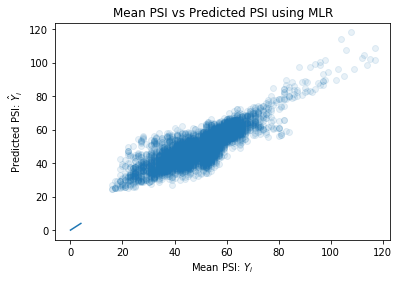

In [73]:

model = lm.fit(X_train, y_train)

y_predict= lm.predict(X_test)

print("Train score:")
print(lm.score(X_train, y_train))

print("Test score:")
print(lm.score(X_test, y_test))

plt.scatter(y_test, y_predict, alpha=0.1)
plt.plot(range(5), range(5))

plt.xlabel("Mean PSI: $Y_i$")
plt.ylabel("Predicted PSI: $\hat{Y}_i$")
plt.title("Mean PSI vs Predicted PSI using MLR")

plt.show()

KNR training set score: 1.0
KNR test set score: 0.7328404708920877


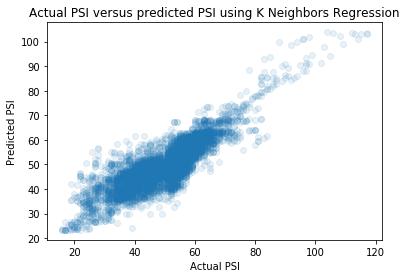

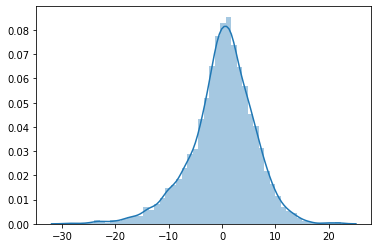

In [74]:
from sklearn.neighbors import KNeighborsRegressor

kn_regressor = KNeighborsRegressor(n_neighbors = 250, weights = "distance")
kn_regressor.fit(X_train, y_train)

knr_training_score = kn_regressor.score(X_train, y_train)

print("KNR training set score: %s" %(knr_training_score))

knr_test_score = kn_regressor.score(X_test, y_test)

print("KNR test set score: %s" %(knr_test_score))

#generate plot showing difference between predicted age and actual age using K Neighbors Regressor

knr_predictions = kn_regressor.predict(X_test)

plt.scatter(y_test, knr_predictions,  alpha=0.1)
plt.title("Actual PSI versus predicted PSI using K Neighbors Regression")
plt.xlabel("Actual PSI")
plt.ylabel("Predicted PSI")
plt.show()

sns.distplot((y_test-knr_predictions),bins=50);

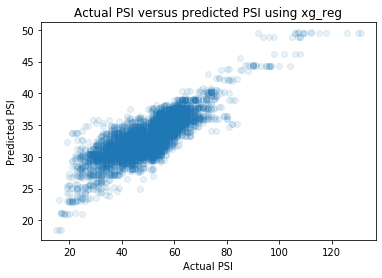

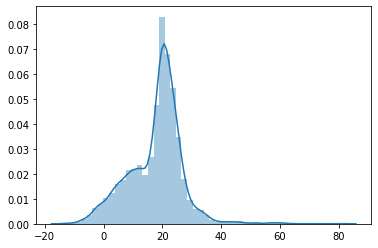

In [75]:
#xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

data_dmatrix = xgb.DMatrix(data=X,label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

plt.scatter(y_test, preds, alpha=0.1)
plt.title("Actual PSI versus predicted PSI using xg_reg")
plt.xlabel("Actual PSI")
plt.ylabel("Predicted PSI")
plt.show()
sns.distplot((y_test-preds),bins=50);

In [0]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

In [0]:
sns.distplot((y_test-preds),bins=50);

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=50, oob_score=True, random_state=0)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)


In [0]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

In [0]:
print('Training Features Shape:', X.shape)
print('Training Labels Shape:', X_train.shape)
print('Testing Features Shape:', y.shape)
print('Testing Labels Shape:', y_train.shape)

In [0]:
# Use the forest's predict method on the test data
y_predict = regressor.predict(X_test)
y_test=y_test.astype(float)
residuals = y_predict - y_test
import matplotlib.pyplot as plt

sns.distplot((residuals),bins=50);

In [0]:
#evaluation metrics
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
from sklearn.ensemble import RandomForestRegressor as rf
predicted_train = regressor.predict(X_train)
predicted_test = regressor.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

In [0]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X, y) 

In [0]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('coefficient of determination R^2 of the prediction.: ',model_score)
y_predict = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predict))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predict))


In [0]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual PSI Values')
ax.set_ylabel('Predicted PSI Values')
ax.set_title("True PSI Values vs Predicted")
plt.show()

In [0]:
# Use the forest's predict method on the test data
y_predict = regressor.predict(X_test)
y_test=y_test.astype(float)
residuals = y_predict - y_test
import matplotlib.pyplot as plt

sns.distplot((residuals),bins=50);

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

In [0]:
from datetime import datetime

datetime_str = '09/19/18 13:55:26'

datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')

print(type(datetime_object))
print(datetime_object)  # printed in default format

In [0]:
#need to add the columns mean and median pm2.5 to each dataset
#create columns for hourly median PSI for each year
#for 2016
psi_df_2016['median']=psi_df_2016.median(axis = 1, skipna = True) 
psi_df_2016['mean']=psi_df_2016[x].mean(axis=1, skipna=True )
#for 2017
psi_df_2017['median']=psi_df_2017.median(axis = 1, skipna = True) 
psi_df_2017['mean']=psi_df_2017[x].mean(axis=1, skipna=True )
#for 2018
psi_df_2018['median']=psi_df_2018.median(axis = 1, skipna = True) 
psi_df_2018['mean']=psi_df_2018[x].mean(axis=1, skipna=True )
#for 2019
psi_df_2019['median']=psi_df_2019.median(axis = 1, skipna = True) 
psi_df_2019['mean']=psi_df_2019[x].mean(axis=1, skipna=True )

In [0]:
psi_df_all.head(10)

In [0]:
x = ['national', 'south', 'north', 'east', 'central', 'timestamp'] 
psi_df_all["timestamp"] = pd.to_datetime(psi_df_all['timestamp'])
psi_df_all.set_index("timestamp")
y_season = psi_df_all[x].resample('MS', on='timestamp').mean()

y_season
y_season.plot()

In [0]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8


decomposition = sm.tsa.seasonal_decompose(y_season, model='additive')
fig = decomposition.plot()

plt.show()

In [0]:
central_diff= y_season['central'].diff(periods=1)
central_diff= central_diff[1:]
central_diff.head(10)
central_diff.mean()
#central_diff.plot()

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(y_season['central'])
plot_acf(central_diff)
# want to ensure stationarity (seems like first difference is more stationary - might pick ARIMA afterall)

In [0]:
AR_train = y_season['central'][:30]
AR_test = y_season['central'][30:]

AR_train.head(100)

In [0]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(AR_train)
model_ar_fit = model_ar.fit()

predictions= model_ar_fit.predict(start=30, end=46)

In [0]:
plt.plot(y_season['central'])
plt.plot(predictions, color='red')
#results if we used a regular AR model

In [0]:
#use a “grid search” to find the optimal set of parameters that yields the best performance for our model
#for param in pdq:
#    for param_seasonal in seasonal_pdq:
#        try:
#            mod = sm.tsa.statespace.SARIMAX(y_season['central'],
#                                            order=param,
#                                            seasonal_order=param_seasonal,
#                                            enforce_stationarity=False,
#                                            enforce_invertibility=False)
            
#            results = mod.fit()
#            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#        except:
#            continue

In [0]:
#from the grid search, ARIMA(1,1,0)x(1,1,1,0,12) yields the lowest AIC value of 143.1, therefore it is the optimal option
mod = sm.tsa.statespace.SARIMAX(y_season['central'],
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False, 
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

In [0]:
#model diagnostics
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [0]:
pred = results.get_prediction(start=30, dynamic=False)
pred_ci = pred.conf_int()
ax = y_season['central'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('PSI')
plt.legend()
plt.show()

In [0]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y_season.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('PSI')
plt.legend()
plt.show()

In [0]:
#check dataset after addition of mean and median columns
psi_df_2016.head()

In [0]:
#visualization of hourly PSI for each year, generate subplots such that we can visualize all four years
#will have to fix x-axis labels first before visualizing subplots
#2016
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(psi_df_2016['timestamp'],psi_df_2016['median'], label='median by hour')
plt.plot(psi_df_2016['timestamp'],psi_df_2016['mean'], label='average by hour')
plt.gcf().autofmt_xdate()
plt.legend(ncol=4, loc='lower right', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
# A hacky way to do it but basically (0 start, 9000 is the number of entries, and 672 is the skips)
plt.xticks(np.arange(0, 9000, 672)) 
# Add title and axis names
plt.title('Hourly Mean and Median PSI (pm2.5) in Singapore from 1 Jan to 31 Dec 2016')
plt.xlabel('Date/Time')
plt.ylabel('PSI (pm2.5)')

plt.show()

In [0]:
import datetime

data = psi_df_2016[['mean', 'timestamp']]
#x = datetime.datetime.strptime(data['timestamp'], "%Y-%m-%dT%H:%M:%W+08:00")  
#datetime_example = datetime.datetime.strptime(example, "%Y-%m-%dT%H:%M:%W+08:00")
#datetime_example
x = [i for i in range(len(data['timestamp']))]

y = data['mean']
plt.scatter(x, y)

z = np.polyfit(x, y, 8)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

In [0]:
indo_df=pd.read_csv('/content/drive/My Drive/Uplevel PSI Prediction/Indonesia_PSI_updated.csv')
print(indo_df)


In [0]:
#need to change timestamp to same format as current datasets


In [0]:
#visualization of hourly PSI for each year, generate subplots such that we can visualize all four years

#2018
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(psi_df_2018['timestamp'],psi_df_2018['median'], label='median by hour')
plt.plot(psi_df_2018['timestamp'],psi_df_2018['mean'], label='average by hour')
plt.gcf().autofmt_xdate()
plt.legend(ncol=4, loc='lower right', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.xticks(np.arange(0, 9000, 672)) 
# Add title and axis names
plt.title('Hourly Mean and Median PSI (pm2.5) in Singapore from 1 Jan to 31 Dec 2018')
plt.xlabel('Date/Time')
plt.ylabel('PSI (pm2.5)')
plt.show()

In [0]:
#visualization of hourly PSI for each year, generate subplots such that we can visualize all four years

#2019
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(psi_df_2019['timestamp'],psi_df_2019['median'], label='median by hour')
plt.plot(psi_df_2019['timestamp'],psi_df_2019['mean'], label='average by hour')
plt.gcf().autofmt_xdate()
plt.legend(ncol=4, loc='lower right', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.xticks(np.arange(0, 9000, 672)) 
# Add title and axis names
plt.title('Hourly Mean and Median PSI (pm2.5) in Singapore from 1 Jan to 31 Dec 2019')
plt.xlabel('Date/Time')
plt.ylabel('PSI (pm2.5)')
plt.show()

In [0]:
#to generate plots by day
#resampling by week
import os
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

#resample daily for 2016
daily_psi_2016 = psi_df_2016
daily_psi_2016["timestamp"] = pd.to_datetime(daily_psi_2016["timestamp"])
type(daily_psi_2016.timestamp[0])
daily_psi_2016.set_index("timestamp")
daily_psi_2016 = daily_psi_2016.resample('D', on='timestamp').median()

#resample daily for 2017
daily_psi_2017 = psi_df_2017
daily_psi_2017["timestamp"] = pd.to_datetime(daily_psi_2017["timestamp"])
type(daily_psi_2017.timestamp[0])
daily_psi_2017.set_index("timestamp")
daily_psi_2017 = daily_psi_2017.resample('D', on='timestamp').median()

#resample daily for 2018
daily_psi_2018 = psi_df_2018
daily_psi_2018["timestamp"] = pd.to_datetime(daily_psi_2018["timestamp"])
type(daily_psi_2018.timestamp[0])
daily_psi_2018.set_index("timestamp")
daily_psi_2018 = daily_psi_2018.resample('D', on='timestamp').median()

#resample daily for 2019
daily_psi_2019 = psi_df_2019
daily_psi_2019["timestamp"] = pd.to_datetime(daily_psi_2019["timestamp"])
type(daily_psi_2019.timestamp[0])
daily_psi_2019.set_index("timestamp")
daily_psi_2019 = daily_psi_2019.resample('D', on='timestamp').median()


In [0]:
#resampling by week

#resample weekly for 2016
weekly_psi_2016 = psi_df_2016
weekly_psi_2016["timestamp"] = pd.to_datetime(weekly_psi_2016["timestamp"])
type(weekly_psi_2016.timestamp[0])
weekly_psi_2016.set_index("timestamp")
weekly_psi_2016 = weekly_psi_2016.resample('W', on='timestamp').median()

#resample weekly for 2017
weekly_psi_2017 = psi_df_2017
weekly_psi_2017["timestamp"] = pd.to_datetime(weekly_psi_2017["timestamp"])
type(weekly_psi_2017.timestamp[0])
weekly_psi_2017.set_index("timestamp")
weekly_psi_2017 = weekly_psi_2017.resample('W', on='timestamp').median()

#resample weekly for 2018
weekly_psi_2018 = psi_df_2018
weekly_psi_2018["timestamp"] = pd.to_datetime(weekly_psi_2018["timestamp"])
type(weekly_psi_2018.timestamp[0])
weekly_psi_2018.set_index("timestamp")
weekly_psi_2018 = weekly_psi_2018.resample('W', on='timestamp').median()

#resample weekly for 2019
weekly_psi_2019 = psi_df_2019
weekly_psi_2019["timestamp"] = pd.to_datetime(weekly_psi_2019["timestamp"])
type(weekly_psi_2019.timestamp[0])
weekly_psi_2019.set_index("timestamp")
weekly_psi_2019 = weekly_psi_2019.resample('W', on='timestamp').median()


In [0]:
#resample monthly

#resample monthly for 2016
monthly_psi_2016 = psi_df_2016
monthly_psi_2016 = monthly_psi_2016.resample('M', on='timestamp').median()
monthly_psi_2016.head(10)

#resample monthly for 2017
monthly_psi_2017 = psi_df_2017
monthly_psi_2017 = monthly_psi_2017.resample('M', on='timestamp').median()
monthly_psi_2017.head(10)

#resample monthly for 2018
monthly_psi_2018 = psi_df_2018
monthly_psi_2018 = monthly_psi_2018.resample('M', on='timestamp').median()
monthly_psi_2018.head(10)

#resample monthly for 2019 
monthly_psi_2019 = psi_df_2019
monthly_psi_2019 = monthly_psi_2019.resample('M', on='timestamp').median()
monthly_psi_2019.head(10)


In [0]:
fig, axs = plt.subplots(1, 4, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0}, figsize = (20,10))
(ax1), (ax2), (ax3), (ax4) = axs
fig.suptitle('Daily PSI comparison, 2016 - 2019')
ax1.plot(daily_psi_2016.index, daily_psi_2016["median"])
ax1.plot(daily_psi_2016.index, daily_psi_2016["mean"])
ax2.plot(daily_psi_2017.index, daily_psi_2017["median"])
ax2.plot(daily_psi_2017.index, daily_psi_2017["mean"])
ax3.plot(daily_psi_2018.index, daily_psi_2018["median"])
ax3.plot(daily_psi_2018.index, daily_psi_2018["mean"])
ax4.plot(daily_psi_2019.index, daily_psi_2019["median"])
ax4.plot(daily_psi_2019.index, daily_psi_2019["mean"])


for ax in axs.flat:
    ax.label_outer()


In [0]:
fig, axs = plt.subplots(1, 4, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0}, figsize = (20,10))
(ax1), (ax2), (ax3), (ax4) = axs
fig.suptitle('Weekly PSI comparison, 2016 - 2019')
ax1.plot(weekly_psi_2016.index, weekly_psi_2016["median"])
ax1.plot(weekly_psi_2016.index, weekly_psi_2016["mean"])
ax2.plot(weekly_psi_2017.index, weekly_psi_2017["median"])
ax2.plot(weekly_psi_2017.index, weekly_psi_2017["mean"])
ax3.plot(weekly_psi_2018.index, weekly_psi_2018["median"])
ax3.plot(weekly_psi_2018.index, weekly_psi_2018["mean"])
ax4.plot(weekly_psi_2019.index, weekly_psi_2019["median"])
ax4.plot(weekly_psi_2019.index, weekly_psi_2019["mean"])

for ax in axs.flat:
    ax.label_outer()


In [0]:
fig, axs = plt.subplots(1, 4, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0}, figsize = (20,10))
(ax1), (ax2), (ax3), (ax4) = axs
fig.suptitle('Monthly PSI comparison, 2016 - 2019')
ax1.plot(monthly_psi_2016.index, monthly_psi_2016["median"])
ax1.plot(monthly_psi_2016.index, monthly_psi_2016["mean"])
ax2.plot(monthly_psi_2017.index, monthly_psi_2017["median"])
ax2.plot(monthly_psi_2017.index, monthly_psi_2017["mean"])
ax3.plot(monthly_psi_2018.index, monthly_psi_2018["median"])
ax3.plot(monthly_psi_2018.index, monthly_psi_2018["mean"])
ax4.plot(monthly_psi_2019.index, monthly_psi_2019["median"])
ax4.plot(monthly_psi_2019.index, monthly_psi_2019["mean"])

for ax in axs.flat:
    ax.label_outer()

#left to right: 2016, 2017, 2018, 2019
#blue: MEAN
#orange: MEDIAN

#should add legend/title for each individual plots

In [0]:
psi_df_2016.iloc[1]['timestamp'].weekday()

In [0]:
psi_df_2016.head()

In [0]:
weekday = [i.weekday() for i in psi_df_2016['timestamp']]

psi_df_2016['weekday'] = weekday

In [0]:
hour = [i.hour for i in psi_df_2016['timestamp']]

psi_df_2016['hour'] = hour

In [0]:
psi_df_2016.head()